In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean
import math
from scipy import constants
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (20,6)
import os
import sys
from scipy.optimize import curve_fit
import scipy.integrate as si
from scipy.integrate import quad
import shutil
import scienceplots 
plt.style.use(['science', 'notebook', 'grid'])

print (time.ctime())

Mon Mar 20 18:10:22 2023


In [82]:
#32 dBm
#SN 1001
#0th order intensity (transmitted but undiffracted) = 6.7 mW

#Y deflector fixed, varying X
yFixed1001 = [72, 79, 67, 68, 67, 61, 58, 35]

#X deflector fixed, varying Y
xFixed1001 = [65, 66, 56, 68, 69, 63, 57, 36]

#SN 1002
#0th order intensity (transmitted but undiffracted) = 6.7 mW

#Y deflector fixed, varying X
yFixed1002 = [69, 80, 78, 75, 80, 72, 58, 35]

#X deflector fixed, varying Y
xFixed1002 = [64, 77, 77, 74, 75, 67, 53, 33]

#Fixed Frequency MHz
fixedFreq = 102.5

#Driving Frequencies MHz
drivingFreqs = [87.5, 92.5, 97.5, 102.5, 107.5, 112.5, 117.5, 122.5]

In [2]:
#20 dBm
#SN 1001
#0th order intensity (transmitted but undiffracted) = 8.0 mW

#Y deflector fixed, varying X
yFixed1001 = [1.4, 1.6, 1.5, 1.3, 1.6, 1.3, 1.2, 1.0]

#X deflector fixed, varying Y
xFixed1001 = [1.0, 0.8, 1.1, 1.4, 1.4, 1.2, 1.3, 0.9]

#SN 1002
#0th order intensity (transmitted but undiffracted) = 7.4 mW

#Y deflector fixed, varying X
yFixed1002 = [1.2, 1.6, 1.5, 1.3, 1.8, 1.4, 1.1, 0.8]

#X deflector fixed, varying Y
xFixed1002 = [0.8, 0.9, 1.1, 1.2, 1.4, 0.9, 0.8, 0.8]

#Fixed Frequency MHz
fixedFreq = 102.5

#Driving Frequencies MHz
drivingFreqs = [87.5, 92.5, 97.5, 102.5, 107.5, 112.5, 117.5, 122.5]

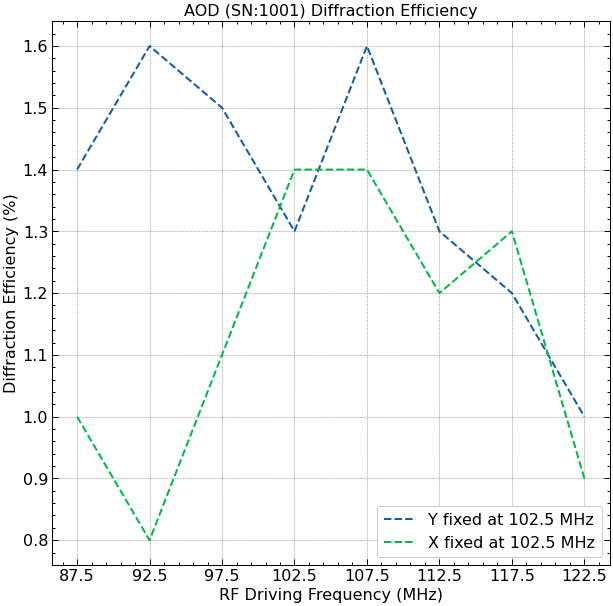

In [4]:
fig, ax = plt.subplots(figsize = (10,10), facecolor='w')
ax.plot(drivingFreqs , yFixed1001, '--',label='Y fixed at 102.5 MHz')
ax.plot(drivingFreqs , xFixed1001, '--',label='X fixed at 102.5 MHz')
# ax.plot(dataframe2['Pwr (uW)'] , dataframe2['Transmission (%)'], '--',label='PGB CIRC 40C')
ax.set_xlabel('RF Driving Frequency (MHz)', fontsize=16)
ax.set_ylabel('Diffraction Efficiency (%)', fontsize=16)
# ax.invert_xaxis()
# ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.legend(loc="best")
ax.set_title('AOD (SN:1001) Diffraction Efficiency',  fontsize=16)
ax.set_xticks(drivingFreqs)
ax.set_xticklabels(drivingFreqs)

textstr = '\n'.join((
    'Beam Diameter=%.2f mm' % (1, ),
    'Laser Wavelength=%d nm' % (795, ),
    '0th Order Undiffracted Power=%.2f mW' % (6.7, )))

# # these are matplotlib.patch.Patch properties
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# # place a text box in upper left in axes coords
# ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# ax.text(127, 50, textstr, fontsize = 14, 
#          bbox = dict(boxstyle='round', facecolor = 'wheat', alpha = 0.5))

# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/"+TEMP+"C/Transmission_PGB_"+TEMP+"C.png")

# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/Transmission_"+BRAND+"_Phase_Locked_40C_60C.png")

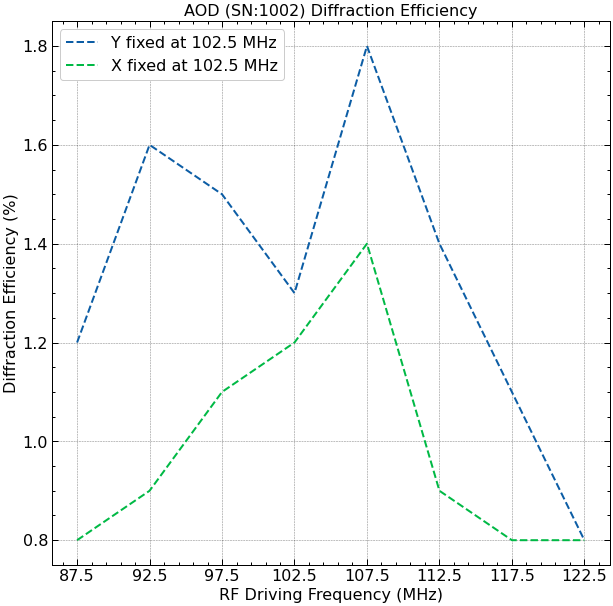

In [5]:
fig, ax = plt.subplots(figsize = (10,10), facecolor='w')
ax.plot(drivingFreqs , yFixed1002, '--',label='Y fixed at 102.5 MHz')
ax.plot(drivingFreqs , xFixed1002, '--',label='X fixed at 102.5 MHz')
# ax.plot(dataframe2['Pwr (uW)'] , dataframe2['Transmission (%)'], '--',label='PGB CIRC 40C')
ax.set_xlabel('RF Driving Frequency (MHz)', fontsize=16)
ax.set_ylabel('Diffraction Efficiency (%)', fontsize=16)
# ax.invert_xaxis()
# ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.legend(loc="best")
ax.set_title('AOD (SN:1002) Diffraction Efficiency',  fontsize=16)
ax.set_xticks(drivingFreqs)
ax.set_xticklabels(drivingFreqs)

textstr = '\n'.join((
    'Beam Diameter=%.2f mm' % (1, ),
    'Laser Wavelength=%d nm' % (795, ),
    '0th Order Undiffracted Power=%.2f mW' % (6.5, )))

# ax.text(127, 50, textstr, fontsize = 14, 
#          bbox = dict(boxstyle='round', facecolor = 'wheat', alpha = 0.5))
# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/"+TEMP+"C/Transmission_PGB_"+TEMP+"C.png")

# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/Transmission_"+BRAND+"_Phase_Locked_40C_60C.png")

In [88]:
time_min = [*range(5,30,5)]
temp_aod2_x = [32.4,28.5,30.6,28.2,32.7]
temp_aod2_y = [38.4,41.1,42.9,44.3,44.0]
temp_aod1_x = [41.0,42.3,44.3,37.5,45.1]
temp_aod1_y = [28.4,44.1,44.2,45.4,42.3]
print(time_min)
print(len(time_min), len(temp_aod2_x), len(temp_aod2_y), len(temp_aod1_x), len(temp_aod1_y))

[5, 10, 15, 20, 25]
5 5 5 5 5


Text(0.5, 1.0, 'AOD Temperature Measurments')

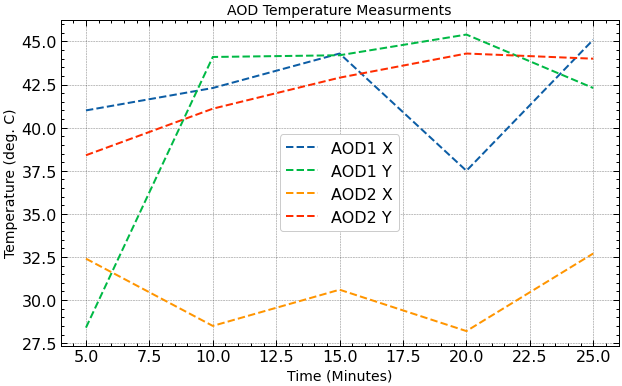

In [90]:
fig, ax = plt.subplots(figsize = (10,6), facecolor='w')
ax.plot(time_min , temp_aod1_x, '--',label='AOD1 X')
ax.plot(time_min , temp_aod1_y, '--',label='AOD1 Y')
ax.plot(time_min , temp_aod2_x, '--',label='AOD2 X')
ax.plot(time_min , temp_aod2_y, '--',label='AOD2 Y')
# ax.plot(dataframe2['Pwr (uW)'] , dataframe2['Transmission (%)'], '--',label='PGB CIRC 40C')
ax.set_xlabel('Time (Minutes)', fontsize=14)
ax.set_ylabel('Temperature (deg. C)', fontsize=14)
# ax.invert_xaxis()
# ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.legend(loc="best")
ax.set_title('AOD Temperature Measurments',  fontsize=14)
# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/"+TEMP+"C/Transmission_PGB_"+TEMP+"C.png")

# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/Transmission_"+BRAND+"_Phase_Locked_40C_60C.png")